In [35]:
# imported required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score

# Loading the data and labels dataset
try:
    data = pd.read_csv('C:/Users/jalad/Downloads/data-1.csv', index_col=0)
    labels = pd.read_csv('C:/Users/jalad/Downloads/labels.csv', index_col=0)
except FileNotFoundError:
    print("Error: Data file not found. Please check the path.") # error message if file not found
    exit() # existing the program if file not found
    

In [36]:
# Checking for missing values in data
missing_data_count = data.isnull().sum()
print("Missing values in 'data' dataset:")
print(missing_data_count)

# Checking for missing values in labels
missing_labels_count = labels.isnull().sum()
print("\nMissing values in 'labels' dataset:")
print(missing_labels_count)

Missing values in 'data' dataset:
gene_0        0
gene_1        0
gene_2        0
gene_3        0
gene_4        0
             ..
gene_20526    0
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Length: 20531, dtype: int64

Missing values in 'labels' dataset:
Class    0
dtype: int64


In [37]:
# Extracting gene expression data from the dataset, excluding the first column contains sample IDs
gene_expressions = data.iloc[:, 1:]  
# Feature scaling
scaler = StandardScaler() # Initializing StandardScaler object
data_scaled = scaler.fit_transform(gene_expressions) # Scaling the gene expression data
print(data_scaled)


[[-0.82802988  0.15980044 -1.94827735 ... -1.18793812 -0.11648251
  -0.26190144]
 [-2.01501735 -1.415042    1.35310867 ... -0.34227662 -1.65688871
  -0.26190144]
 [ 0.41734754  1.15673547  0.24980678 ...  0.88686027 -1.85526414
  -0.26190144]
 ...
 [ 0.19888076  0.57481583  2.29252891 ... -0.22008186 -0.41046699
   1.3485582 ]
 [-0.35045311 -0.28863152  0.93405433 ...  1.43719268  0.09195083
  -0.26190144]
 [-0.57135218  0.66725377 -0.3008362  ...  0.45087581 -0.47161901
  -0.26190144]]


0.083534082609169
0.10569856018072962
0.12196119392105621
0.13534107695378422
0.11224305387440027
0.11554306611028851
0.09960760957879781
0.0941295074495336
0.08678917510182052


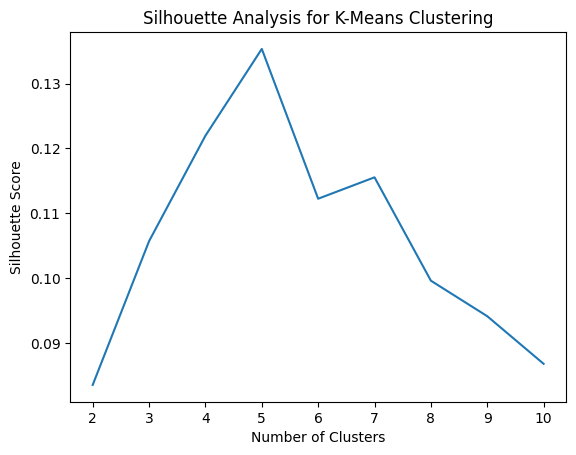

Optimal number of clusters: 5


In [38]:
# Determining the optimal number of clusters using silhouette analysis
silhouette_sc = [] # created an empty list to store silhouette scores
for k in range(2, 11):  # looping over the range of cluster numbers
    kmeans = KMeans(n_clusters=k, random_state=42)  # Setting up the KMeans clustering method to group data into 'k' clusters
    cluster_l = kmeans.fit_predict(data_scaled) # performing clustering process and obtaining the labels for each data point, which indicate the cluster to which it belongs.
    silhouette_score_value = silhouette_score(data_scaled, cluster_l) # calculating silhouette score
    print(silhouette_score_value) # printing the silhouette score
    silhouette_sc.append(silhouette_score_value) # Appending silhouette score to the list
# Plotting silhouette scores
plt.plot(range(2, 11), silhouette_sc) # plotting silhouette scores against the number of clusters
plt.xlabel('Number of Clusters') #  label to x-axis 
plt.ylabel('Silhouette Score') #  label to y-axis

plt.title('Silhouette Analysis for K-Means Clustering') #title of the plot 
plt.show() # display the plot
# number of clusters  chosen based on the highest silhouette score
optimal_k_value = silhouette_sc.index(max(silhouette_sc))+2 # Figuring out the optimal number of clusters.
print("Optimal number of clusters:", optimal_k_value) # printing the optimal no of clusters value

           PC1        PC2
0   -57.447813  95.411326
1   -16.919309   0.732354
2   -70.344817 -19.303716
3   -49.161277  -9.227513
4   -18.131747 -51.327570
..         ...        ...
796 -12.416681 -42.321168
797 -29.415751  28.526190
798  -4.133121  15.690235
799 -30.814921  33.526837
800 -22.344415   4.052623

[801 rows x 2 columns]


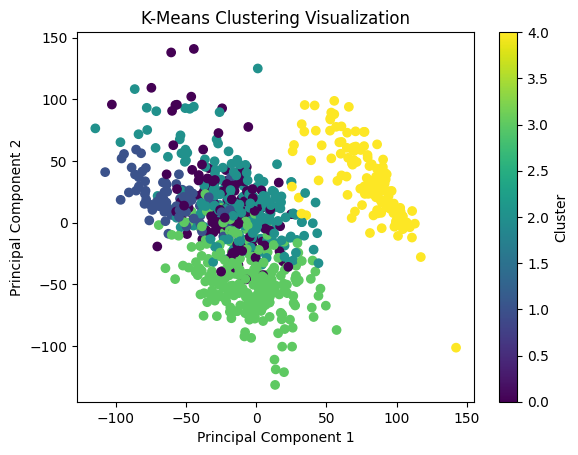

In [39]:

# Performing k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k_value, random_state=42) # Initializing optimal K value to the no of clusters 
# Performing clustering and obtaining cluster labels.
cluster_l = kmeans.fit_predict(data_scaled)
# Converting class labels to numerical 
class_l = labels['Class'].astype('category').cat.codes
#PCA for dimensionality reduction
# Visualize the clustering results 
pca = PCA(n_components=2)  # pca object for 2- dimensional visualization
reduced_data = pca.fit_transform(data_scaled) # using pca reduced data dimension to 2D

reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])

# Print the dataframe
print(reduced_df)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_l, cmap='viridis')# plotted clustered data points to 2D
plt.xlabel('Principal Component 1') # label to x-axis
plt.ylabel('Principal Component 2') # label to y-axis
plt.title('K-Means Clustering Visualization') # title of the plot

# Added color bar with label cluster
plt.colorbar(label='Cluster') 

plt.show() # to display plot

In [40]:
# Analyzing cluster composition
# Creating a data frame to hold the cluster labels and original class labels
cluster_mapping = pd.DataFrame({'Cluster': cluster_l, 'Class': class_l})
# Group by cluster and class, and count occurrences
cluster_class_counts = cluster_mapping.groupby(['Cluster', 'Class']).size().reset_index(name='Count')
# Pivot the table for better visualization
cluster_class_counts_pivot = cluster_class_counts.pivot(index='Cluster', columns='Class', values='Count')
# Filling NaN values with 0
cluster_class_counts_pivot = cluster_class_counts_pivot.fillna(0)
# Normalize=ing the counts by dividing by the total count of each cluster
cluster_class_counts_pivot = cluster_class_counts_pivot.div(cluster_class_counts_pivot.sum(axis=1), axis=0)
print("Percentage of each class within each cluster:")
print(cluster_class_counts_pivot)

Percentage of each class within each cluster:
Class           0         1         2         3         4
Cluster                                                  
0        0.000000  0.000000  0.000000  0.000000  1.000000
1        0.000000  1.000000  0.000000  0.000000  0.000000
2        0.257576  0.020202  0.015152  0.702020  0.005051
3        0.988095  0.000000  0.000000  0.007937  0.003968
4        0.000000  0.000000  1.000000  0.000000  0.000000


In [41]:
# Calculating Adjusted Rand Index 
ari = adjusted_rand_score(class_l, cluster_l) # Calculating the Adjusted Rand Index between the true labels and predicted clusters
print("Adjusted Rand Index (ARI):", ari) # printing the ARI

Adjusted Rand Index (ARI): 0.797191727212985
